## Explore Dataset

In [1]:
import pandas as pd
#define the dataset location
filename="C://Users//Arnav Phukan//Desktop//Workspace//Phoneme Imbalanced Classification"
#load the csv file as a data frame
df=pd.read_csv('Phoneme.csv',header=None)

In [2]:
#summarize the shape of the dataset
print(df.shape)

(5404, 6)


In [3]:
from collections import Counter
#summarize the class distribution
target=df.values[:,-1]
counter=Counter(target)
for k,v in counter.items():
    per=v/len(target)*100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0.0, Count=3818, Percentage=70.651%
Class=1.0, Count=1586, Percentage=29.349%


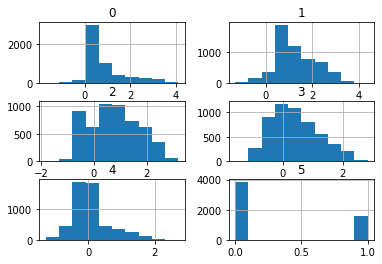

In [5]:
#create histograms of numeric input values
from pandas import read_csv
from matplotlib import pyplot
#define the dataset location
filename="C://Users//Arnav Phukan//Desktop//Workspace//Phoneme Imbalanced Classification"
#load the csv file as a data frame
df3=pd.read_csv('Phoneme.csv',header=None)
df3.hist()
pyplot.show()


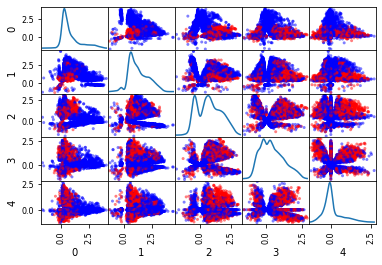

In [6]:
#create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
#define the dataset location
filename="C://Users//Arnav Phukan//Desktop//Workspace//Phoneme Imbalanced Classification"
#load the csv file as a data frame
df1=pd.read_csv('Phoneme.csv',header=None)
# define a mapping of class values to colors
color_dict = {0:'blue', 1:'red'}
# map each row to a color based on the class value
colors = [color_dict[x] for x in df.values[:, -1]]
# drop the target variable
inputs = DataFrame(df.values[:, :-1])
# pairwise scatter plots of all numerical variables
scatter_matrix(inputs, diagonal='kde', color=colors)
pyplot.show()


## Model Test and Baseline Result

In [11]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

#load the dataset
#define the dataset location
def load_dataset(filename):
    filename="C://Users//Arnav Phukan//Desktop//Workspace//Phoneme Imbalanced Classification"
    #load the csv file as a data frame
    data=pd.read_csv('Phoneme.csv',header=None)
    #retrieve numpy array
    data=data.values
    #split into input and output elements
    X,y=data[:,:-1],data[:,-1]
    return X,y

#evaluate a model
def evaluate_model(X,y,model):
    #define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
filename = "C://Users//Arnav Phukan//Desktop//Workspace//Phoneme Imbalanced Classification"
#load the csv file as a data frame
data=pd.read_csv('Phoneme.csv',header=None)
# load the dataset
X, y = load_dataset(data)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='uniform')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean G-Mean: %.3f (%.3f)' % (mean(scores), std(scores)))

Using TensorFlow backend.


(5404, 5) (5404,) Counter({0.0: 3818, 1.0: 1586})
Mean G-Mean: 0.499 (0.020)


## Evaluate Models

>LR 0.636 (0.025)
>SVM 0.803 (0.021)
>BAG 0.886 (0.017)
>RF 0.891 (0.018)
>ET 0.896 (0.018)


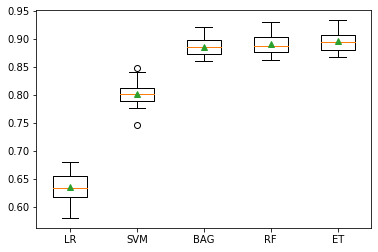

In [8]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores
 
# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    return models, names
 
# define the location of the dataset
full_path = 'phoneme.csv'
# load the dataset
X, y = load_dataset(full_path)
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>ROS 0.896 (0.018)
>SMOTE 0.905 (0.017)
>BLSMOTE 0.907 (0.015)
>SVMSMOTE 0.907 (0.016)
>ADASYN 0.909 (0.014)


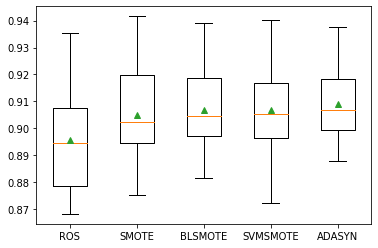

In [2]:
# data oversampling algorithms on the phoneme imbalanced dataset
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data =pd.read_csv('Phoneme.csv', header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation the metric
    metric = make_scorer(geometric_mean_score)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores
 
# define oversampling models to test
def get_models():
    models, names = list(), list()
    # RandomOverSampler
    models.append(RandomOverSampler())
    names.append('ROS')
    # SMOTE
    models.append(SMOTE())
    names.append('SMOTE')
    # BorderlineSMOTE
    models.append(BorderlineSMOTE())
    names.append('BLSMOTE')
    # SVMSMOTE
    models.append(SVMSMOTE())
    names.append('SVMSMOTE')
    # ADASYN
    models.append(ADASYN())
    names.append('ADASYN')
    return models, names
 
full_path = "C://Users//Arnav Phukan//Desktop//Workspace//Phoneme Imbalanced Classification"
#load the csv file as a data frame
df2=pd.read_csv('Phoneme.csv',header=None)
# load the dataset
X, y = load_dataset(df2)
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # define the model
    model = ExtraTreesClassifier(n_estimators=1000)
    # define the pipeline steps
    steps = [('s', MinMaxScaler()), ('o', models[i]), ('m', model)]
    # define the pipeline
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Make Prediction on New Data

In [4]:
# fit a model and make predictions for the on the phoneme dataset
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.pipeline import Pipeline
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    data =pd.read_csv('Phoneme.csv', header=None)
    # retrieve numpy array
    data = data.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    return X, y
 
full_path = "C://Users//Arnav Phukan//Desktop//Workspace//Phoneme Imbalanced Classification"
#load the csv file as a data frame
df3=pd.read_csv('Phoneme.csv',header=None)
# load the dataset
X, y = load_dataset(df3)
# define the model
model = ExtraTreesClassifier(n_estimators=1000)
# define the pipeline steps
steps = [('s', MinMaxScaler()), ('o', ADASYN()), ('m', model)]
# define the pipeline
pipeline = Pipeline(steps=steps)
# fit the model
pipeline.fit(X, y)
# evaluate on some nasal cases (known class 0)
print('Nasal:')
data = [[1.24,0.875,-0.205,-0.078,0.067],
    [0.268,1.352,1.035,-0.332,0.217],
    [1.567,0.867,1.3,1.041,0.559]]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 0)' % (label))
# evaluate on some oral cases (known class 1)
print('Oral:')
data = [[0.125,0.548,0.795,0.836,0.0],
    [0.318,0.811,0.818,0.821,0.86],
    [0.151,0.642,1.454,1.281,-0.716]]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 1)' % (label))

Nasal:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
Oral:
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
